In [1]:
! . .venv/bin/activate
! sstat -j $SLURM_JOB_ID 

JobID         MaxVMSize  MaxVMSizeNode  MaxVMSizeTask  AveVMSize     MaxRSS MaxRSSNode MaxRSSTask     AveRSS MaxPages MaxPagesNode   MaxPagesTask   AvePages     MinCPU MinCPUNode MinCPUTask     AveCPU   NTasks AveCPUFreq ReqCPUFreqMin ReqCPUFreqMax ReqCPUFreqGov ConsumedEnergy  MaxDiskRead MaxDiskReadNode MaxDiskReadTask  AveDiskRead MaxDiskWrite MaxDiskWriteNode MaxDiskWriteTask AveDiskWrite TRESUsageInAve TRESUsageInMax TRESUsageInMaxNode TRESUsageInMaxTask TRESUsageInMin TRESUsageInMinNode TRESUsageInMinTask TRESUsageInTot TRESUsageOutAve TRESUsageOutMax TRESUsageOutMaxNode TRESUsageOutMaxTask TRESUsageOutMin TRESUsageOutMinNode TRESUsageOutMinTask TRESUsageOutTot 
------------ ---------- -------------- -------------- ---------- ---------- ---------- ---------- ---------- -------- ------------ -------------- ---------- ---------- ---------- ---------- ---------- -------- ---------- ------------- ------------- ------------- -------------- ------------ --------------- --------------- 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
project_dir = "../../../"
games = pd.read_csv(f'{project_dir}/games.csv')
plays = pd.read_csv(f'{project_dir}/plays.csv')
players = pd.read_csv(f'{project_dir}/players.csv')
tracking_df = pd.read_csv(f'{project_dir}/tracking_week_2.csv')
player_play = pd.read_csv(f'{project_dir}/player_play.csv')

# What player positions usually cause pressure?

Available positions are Index(['DE', 'OLB', 'DT', 'ILB', 'NT', 'CB', 'SS', 'FS', 'MLB', 'LB', 'DB'], dtype='object', name='position')


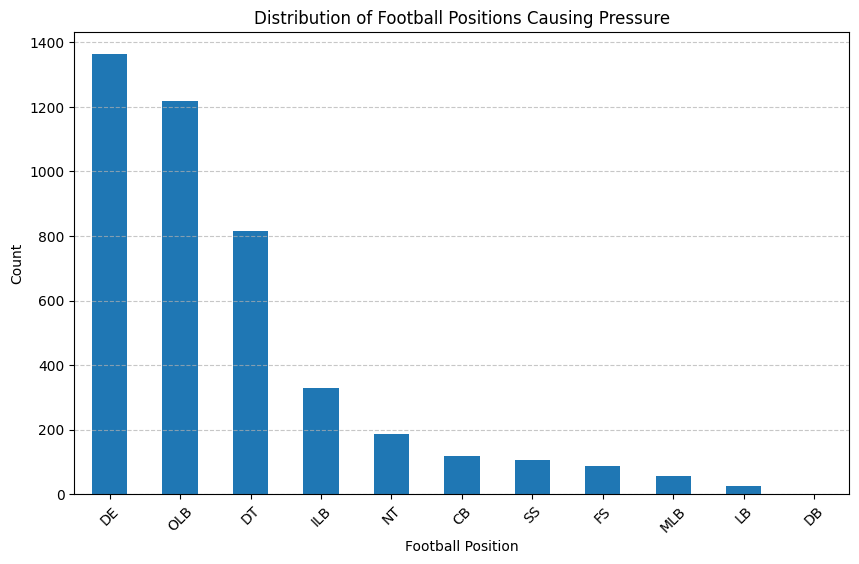

In [5]:
merged_df = pd.merge(player_play, players, on='nflId')

# Filter for rows where causedPressure is True
pressure_players = merged_df[merged_df['causedPressure'] == True]

# Count the types of football positions from the 'position' column
position_counts = pressure_players['position'].value_counts()

print(f"Available positions are {position_counts.index}")

# Plot a histogram of football position counts
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar')
plt.title('Distribution of Football Positions Causing Pressure')
plt.xlabel('Football Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# How often is there motion in each play?

In [12]:
# Load the df CSVs/plays_filtered.csv
df = pd.read_csv(f'CSVs/plays_filtered.csv')

# Extract the unique gameId and playId in player_play where the player inMotionAtBallSnap = True
in_motion = player_play[player_play['inMotionAtBallSnap'] == True][['gameId', 'playId']].drop_duplicates()

# Count the number of plays where the gameId and playId of in_motion are in df
num_in_motion = df[(df['gameId'].isin(in_motion['gameId'])) & (df['playId'].isin(in_motion['playId']))].shape[0]
print(f"Number of plays where the player is in motion at the ball snap: {num_in_motion}")

print(len(df))

Number of plays where the player is in motion at the ball snap: 6204
8522


/scratch/local/54471974/ipykernel_3447198/4240248256.py:2: DtypeWarning: Columns (33,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'CSVs/plays_filtered.csv')


# Do DE, OLB, and DT vary in their count on the field often?

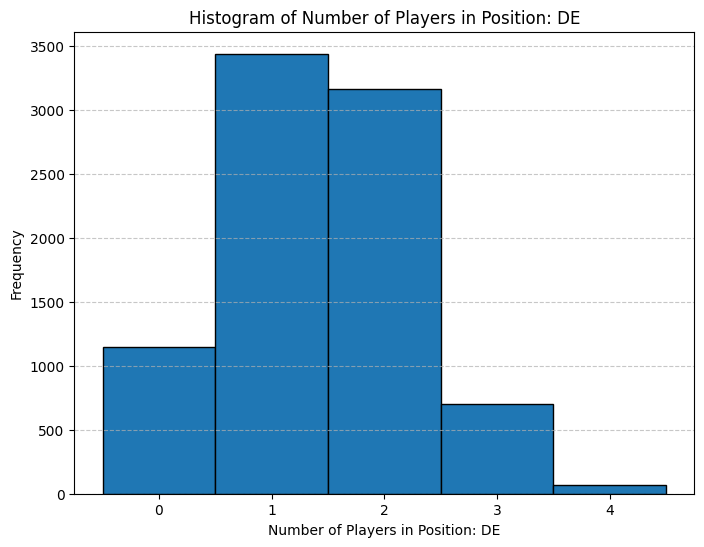

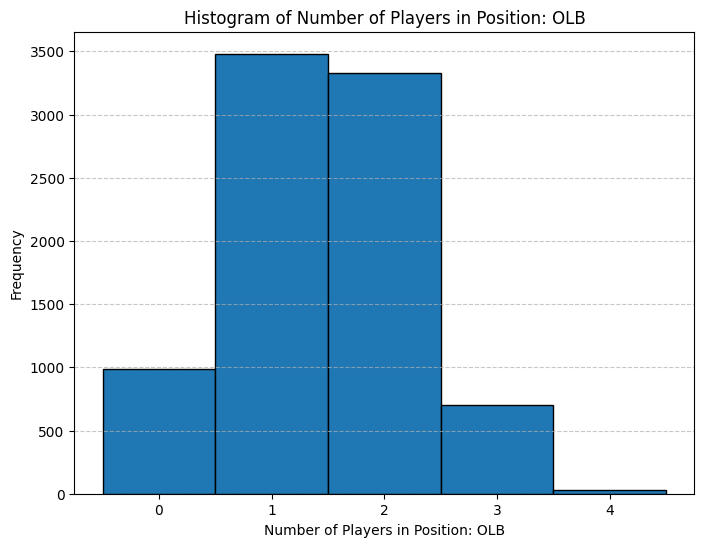

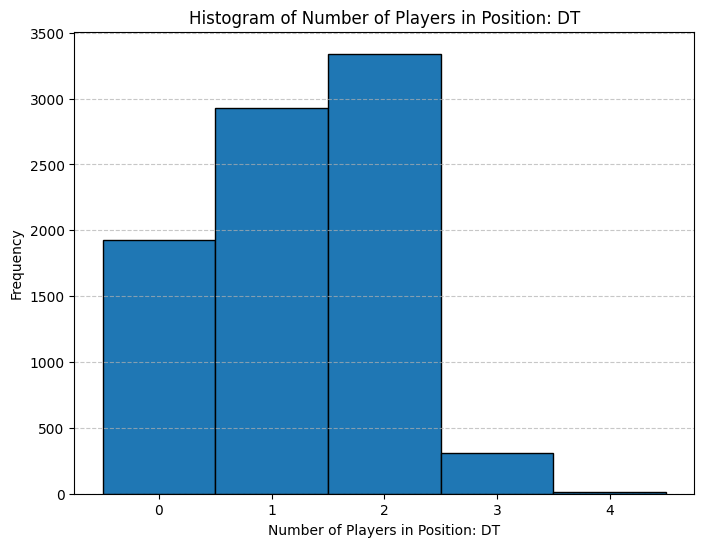

In [13]:
# I have the cols DE, OLB, and DT for each play in the df, and they count the number of players with the respective positions
# Plot a histogram of the number of players with the positions DE, OLB, and DT

positions = ['DE', 'OLB', 'DT']
for position in positions:
    plt.figure(figsize=(8, 6))
    plt.hist(df[position], bins=range(df[position].min(), df[position].max() + 2), edgecolor='black', align='left')
    plt.title(f"Histogram of Number of Players in Position: {position}")
    plt.xlabel(f"Number of Players in Position: {position}")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()